<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


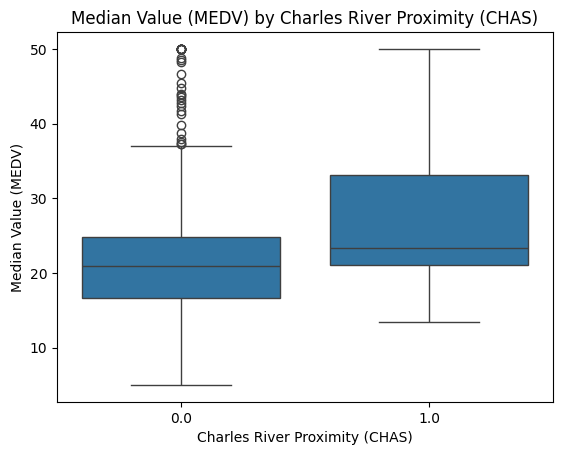

In [14]:
MEDVbyCHAS = sns.boxplot(x="CHAS",
                y="MEDV",
                data=boston_df)

# Set the title
pyplot.title("Median Value (MEDV) by Charles River Proximity (CHAS)")

# Set the x-axis label
pyplot.xlabel("Charles River Proximity (CHAS)")

# Set the y-axis label
pyplot.ylabel("Median Value (MEDV)")
pyplot.show()

According to this box-plot analysis, there is a clear correlation between Charles river proximity and the median value of houses.
It should be noted that there is a significant of outliers among the houses that are not in proximity to the Charles River.

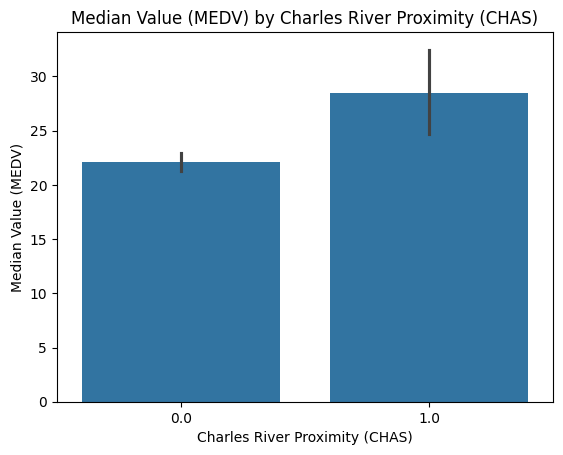

In [15]:
MEDVbyCHAS = sns.barplot(x="CHAS",
                y="MEDV",
                data=boston_df)

# Set the title
pyplot.title("Median Value (MEDV) by Charles River Proximity (CHAS)")

# Set the x-axis label
pyplot.xlabel("Charles River Proximity (CHAS)")

# Set the y-axis label
pyplot.ylabel("Median Value (MEDV)")
pyplot.show()

The bar-plot analysis also shows a clear correlation between Charles river proximity and the median value of houses.

In [17]:
age_groups = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


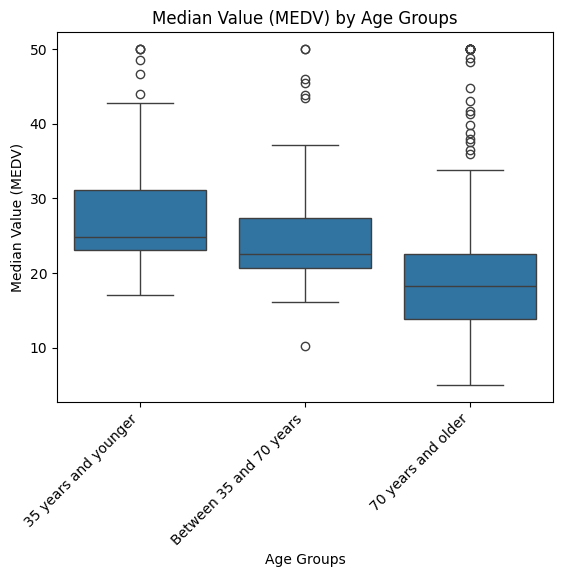

In [21]:
MEDVbyAGE = sns.boxplot(x=age_groups, y=boston_df['MEDV'])

# Set the title
pyplot.title("Median Value (MEDV) by Age Groups")

# Set the x-axis label
pyplot.xlabel("Age Groups")
pyplot.xticks(rotation=45, ha='right')

# Set the y-axis label
pyplot.ylabel("Median Value (MEDV)")

pyplot.show()

According to this box-plot analysis, there is a clear correlation between age group and the median value of houses. 

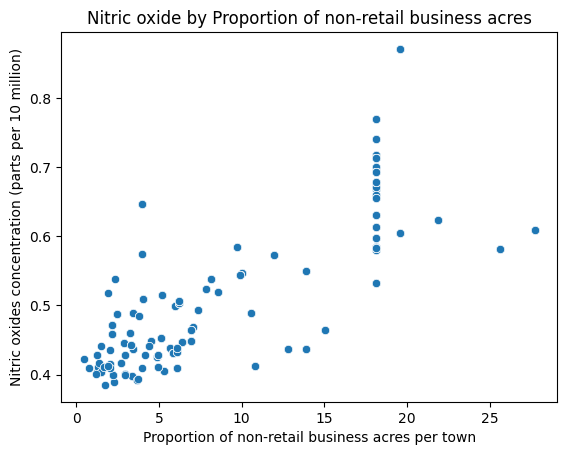

In [23]:
Nitricnonretail = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

# Set the title
pyplot.title("Nitric oxide by Proportion of non-retail business acres")

# Set the x-axis label
pyplot.xlabel("Proportion of non-retail business acres per town")

# Set the y-axis label
pyplot.ylabel("Nitric oxides concentration (parts per 10 million)")

pyplot.show()

According to this scatter-plot analysis, there is a correlation between the proportion of non-retail business acres and Nitric oxides concentration.

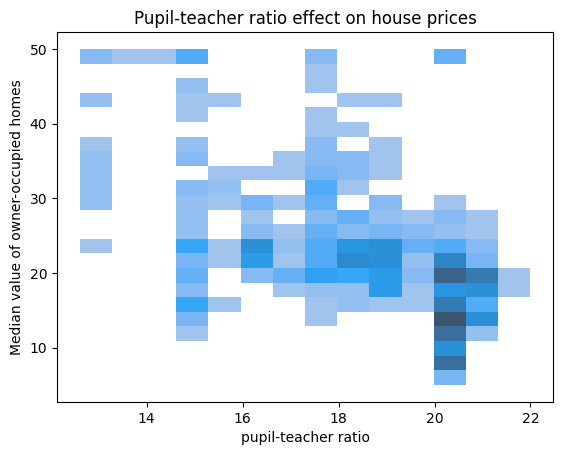

In [25]:
PTRATIO = sns.histplot(x='PTRATIO', y='MEDV', data=boston_df)

# Set the title
pyplot.title("Pupil-teacher ratio effect on house prices")

# Set the x-axis label
pyplot.xlabel("pupil-teacher ratio")

# Set the y-axis label
pyplot.ylabel("Median value of owner-occupied homes")

pyplot.show()

According to this histogram analysis, there is a correlation between the pupil-teacher ratio and house values

### Is there a significant difference in median value of houses bounded by the Charles river or not? ###
- Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River and those not bounded by the river.
- Alternative Hypothesis (Ha): There is a significant difference in the median value of houses bounded by the Charles River and those not bounded by the river.

In [27]:
# Separate the data into two groups based on the CHAS variable
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform the t-test for independent samples
t_statistic, p_value = stats.ttest_ind(chas_0, chas_1)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05


The calculated p-value (0.0000739) is less than the significance level (α = 0.05).
Therefore, we reject the null hypothesis (H0) and accept the alternative hypothesis (Ha).
We conclude that there is a significant difference in the median value of houses bounded by the Charles River and those not bounded by the river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA) ###
- Null Hypothesis (H0): There is no significant difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE).
- Alternative Hypothesis (Ha): There is a significant difference in the median values of houses (MEDV) for at least one proportion of owner-occupied units built prior to 1940 (AGE).

In [28]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(
    boston_df[age_groups == '35 years and younger']['MEDV'],
    boston_df[age_groups == 'Between 35 and 70 years']['MEDV'],
    boston_df[age_groups == '70 years and older']['MEDV']
)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


- The calculated p-value (1.7105011022702984e-15) is less than the significance level (α = 0.05).
- Therefore, we reject the null hypothesis (H0) and accept the alternative hypothesis (Ha).
- We conclude that there is a significant difference in the median values of houses (MEDV) for at least one proportion of owner-occupied units built prior to 1940 (AGE).

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation) ###

State the hypothesis:
- Null Hypothesis (H0): There is no significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
- Alternative Hypothesis (Ha): There is a significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

In [30]:
# Perform Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


- The calculated p-value (7.913361061210442e-98) is less than the significance level (α = 0.05).
- Therefore, we reject the null hypothesis (H0) and accept the alternative hypothesis (Ha).
- We conclude that there is a significant correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis) ###
State the hypothesis:
- Null Hypothesis (H0): There is no significant impact of an additional weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV).
- Alternative Hypothesis (Ha): There is a significant impact of an additional weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV).

In [31]:
# Add a constant term to the independent variable
X = sm.add_constant(boston_df['DIS'])

# Fit the regression model
model = sm.OLS(boston_df['MEDV'], X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 12 May 2024   Prob (F-statistic):           1.21e-08
Time:                        17:58:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

#### Results summary:
- The coefficient of DIS is -1.0916, which means that for every one unit increase in the weighted distance to the five Boston employment centers, the median value of owner-occupied homes decreases by approximately $1,092.
- The p-value for the DIS coefficient is 0.000, which is less than the significance level (α = 0.05). This indicates that the impact of DIS on MEDV is statistically significant.
- The R-squared value is 0.062, indicating that approximately 6.2% of the variation in the median value of owner-occupied homes can be explained by the weighted distance to the five Boston employment centers.

#### Conclusion:

- We reject the null hypothesis (H0) and accept the alternative hypothesis (Ha).
- We conclude that there is a significant negative impact of an additional weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV).